# Acquisition

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### Read data: CSV --> Pandas DataFrame

In [37]:
df = pd.read_csv('fitbit/fitbit_time_series.csv')
df.head(3)

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,2018-04-26,"2,635","2,931",1.38,2.0,"1,347",93.0,0.0,0.0,566
1,2018-04-27,"3,649","9,971",4.70,19.0,"1,158",219.0,46.0,17.0,"1,752"
2,2018-04-28,"3,379","3,521",1.66,2.0,702,155.0,22.0,11.0,"1,124"


#### Initial Data Summary

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    247 non-null    object 
 1   Calories Burned         225 non-null    object 
 2   Steps                   225 non-null    object 
 3   Distance                225 non-null    float64
 4   Floors                  225 non-null    float64
 5   Minutes Sedentary       225 non-null    object 
 6   Minutes Lightly Active  225 non-null    float64
 7   Minutes Fairly Active   225 non-null    float64
 8   Minutes Very Active     225 non-null    float64
 9   Activity Calories       225 non-null    object 
dtypes: float64(5), object(5)
memory usage: 19.4+ KB


### Acquisition Takeaways
- Date needs to be converted to datetime type
- Missing values need to be dropped. These are the last two weeks that need to be predicted by a model.
- Columns/Features need to be lowercases and spaces replaces by underscore for best practice and easy reading/writing.
- Data types need to be corrected since all variables seem to be numberical so integer or float types.

---
# Preparation
- Account for the details in Acquisition

#### Data Cleaning

In [39]:
# drop last 22 days since we will be predicting them
df = df[:-22]

In [40]:
# lowercase the features, use a '_' to replace whitespace
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [41]:
# change 'date' --> datetime type
df.date = pd.to_datetime(df.date)

In [42]:
# change the index --> date, sort by date
df.set_index(df.date, inplace=True)
df = df.sort_index()

In [43]:
# drop remaining date column
df.drop(columns='date', inplace=True)

In [44]:
# change the commas in 'calories_burned, steps, 
# minutes_sedentary, activity_calories' --> '_'
# change columns to int type
df['calories_burned'] = df['calories_burned'].str.replace(',', '_').astype('int')
df['steps'] = df['steps'].str.replace(',', '_').astype('int')
df['minutes_sedentary'] = df['minutes_sedentary'].str.replace(',', '_').astype('int')
df['activity_calories'] = df['activity_calories'].str.replace(',', '_').astype('int')

#### Prepared Data Summary

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   calories_burned         225 non-null    int64  
 1   steps                   225 non-null    int64  
 2   distance                225 non-null    float64
 3   floors                  225 non-null    float64
 4   minutes_sedentary       225 non-null    int64  
 5   minutes_lightly_active  225 non-null    float64
 6   minutes_fairly_active   225 non-null    float64
 7   minutes_very_active     225 non-null    float64
 8   activity_calories       225 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 15.9 KB


#### Prepared Data peek

In [46]:
df.head(3)

,calories_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories
0,2635,2931,1.38,2.0,1347,93.0,0.0,0.0,566
1,3649,9971,4.70,19.0,1158,219.0,46.0,17.0,1752
2,3379,3521,1.66,2.0,702,155.0,22.0,11.0,1124


#### Distribution of each Variable
- Nearly Normal: 
    - `calories_burned` 
    - `minutes_sedentary`
    - `minutes_lightly_active`
    - `activity_calories`
- Skewed Right:
    - `steps`
    - `distance`
    - `floors`
    - `minutes_fairly_active`
    - `minutes_very_active`

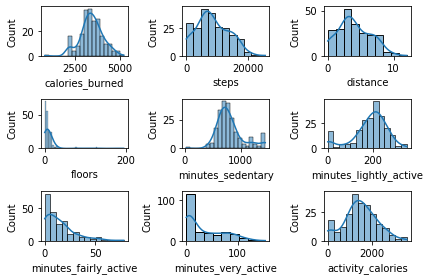

In [66]:
count=0
for i in df:
    count+=1
    plt.subplot(3, 3, count)
    sns.histplot(data=df, x=i, kde=True)
plt.tight_layout()

### Preparation Takeaways
- All variables are continous
- We have 9 variables total
- There are 225 observations
- Each observation contain the metrics for one day

---
## Data Preprocessing
- Prepare for exploration
- Split the data into train, validate and test
- create `month` and `weekday` features